The dataset I chose was crime stats. I chose this data set as crime plays a huge role in determining the safety of a neighborhood. Neighborhoods with less crime are always the safest, and therefore the best. I used two metrics to find the safest neightborhood. The first was the number of crimes being commited in each neighborhood. This gives us a baseline understanding on the crimes being commited in each neighborhood. However this metric is not 100% reliable as different neighborhoods have different populations. The next metric was the crime hierarchy number which ranks crimes based off of severness, which would give more insite into each neighborhoods safety. The neighborhoods were ranked off the these two metrics and then I averaged the scores to get a final ranking. 

Sorts the number of crimes committed in each neigborhood from least to most.

Top 10:
1: Mt. Oliver Boro
2: Mt. Oliver Neighborhood
3: Troy Hill-Herrs Island
4: Outside County
5: Ridgemont
6: Chartiers City
7: New Homestead
8: East Carnegie
9: Outside State
10: Swisshelm Park


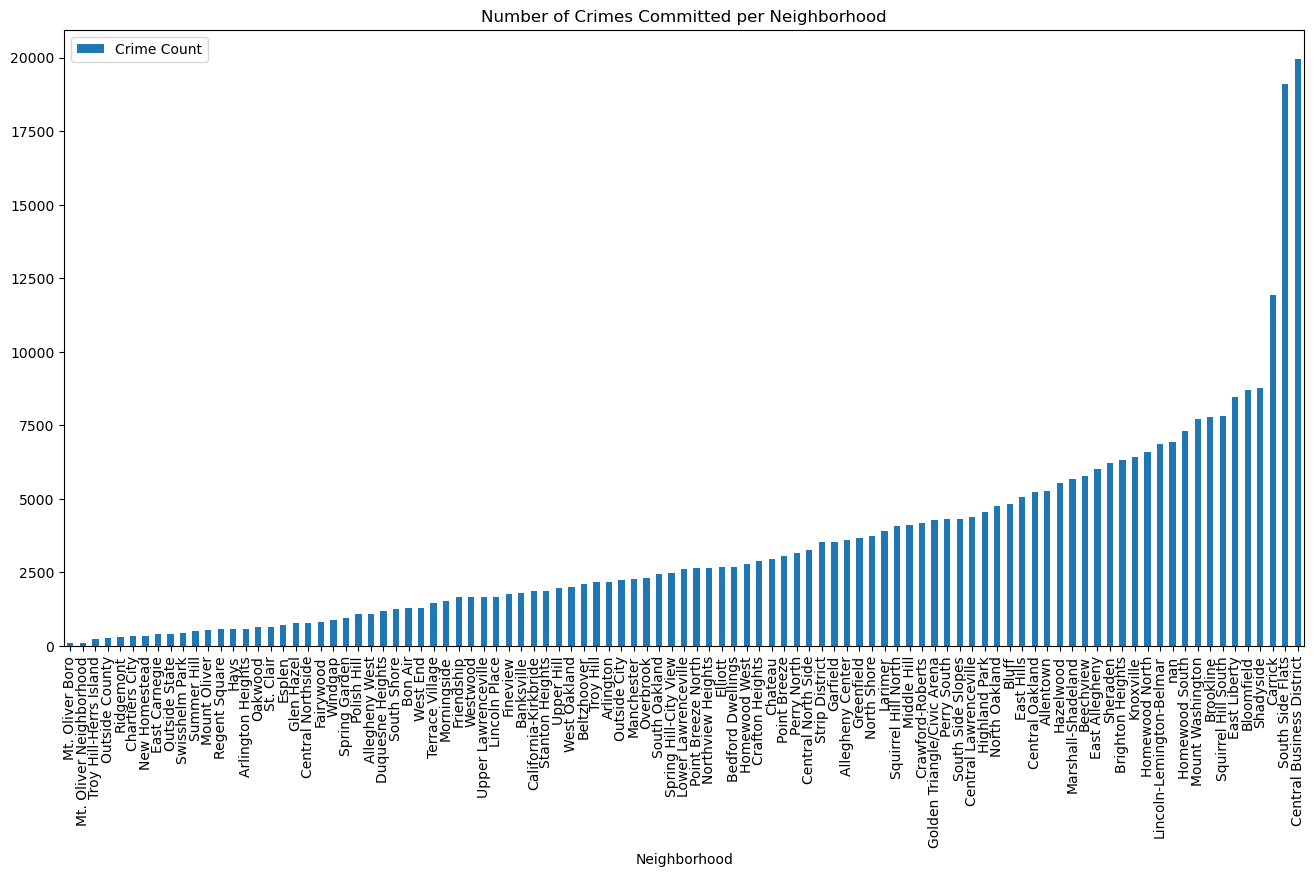

In [33]:
import pandas as pd
crime_stats = pd.read_csv("CrimeStats.csv")
#assigns each neighborhood to the number of crimes commited in it 
crime_stats_by_number = {}
for i in range(len(crime_stats)):
    neighborhood = crime_stats.iloc[i,7]
    if neighborhood in crime_stats_by_number:
        crime_stats_by_number[neighborhood]+= 1
    else:
        crime_stats_by_number[neighborhood] = 1

#sorts from least amount of crimes to most amount 
sorted_crime_stats_by_number = dict(sorted(crime_stats_by_number.items(), key=lambda item: item[1]))

#Stores as df for data visualization 
crimes_count_df = pd.DataFrame(list(sorted_crime_stats_by_number.items()), columns=['Neighborhood', 'Crime Count'])
crimes_count_df.plot(
    x='Neighborhood', 
    y='Crime Count', 
    kind='bar', 
    figsize=(16, 8), 
    title='Number of Crimes Committed per Neighborhood', 
)

#assigns each city a ranking with the lower score meaning less crimes, and therefore more safe
number_of_crimes_score ={} 
i = 1
for key in sorted_crime_stats_by_number:
    number_of_crimes_score[key]= i
    i += 1 

#prints top 10 
print("Top 10:")
i = 1 
for key in number_of_crimes_score:
    if i <=10:
        print(f"{i}: {key}")
    i += 1

Crimes are all given a hierachy number, which indicates the severity of a crime. A low hierachy number indicates a more severe and violent crime and a high hierarchy number indicates a less severe or non-criminal offense. The below code sorts the the average crime hierachy number by neighborhood. 

Top 10:
1: Chateau
2: Outside State
3: Outside City
4: West End
5: Outside County
6: California-Kirkbride
7: South Shore
8: Hays
9: Banksville
10: Troy Hill


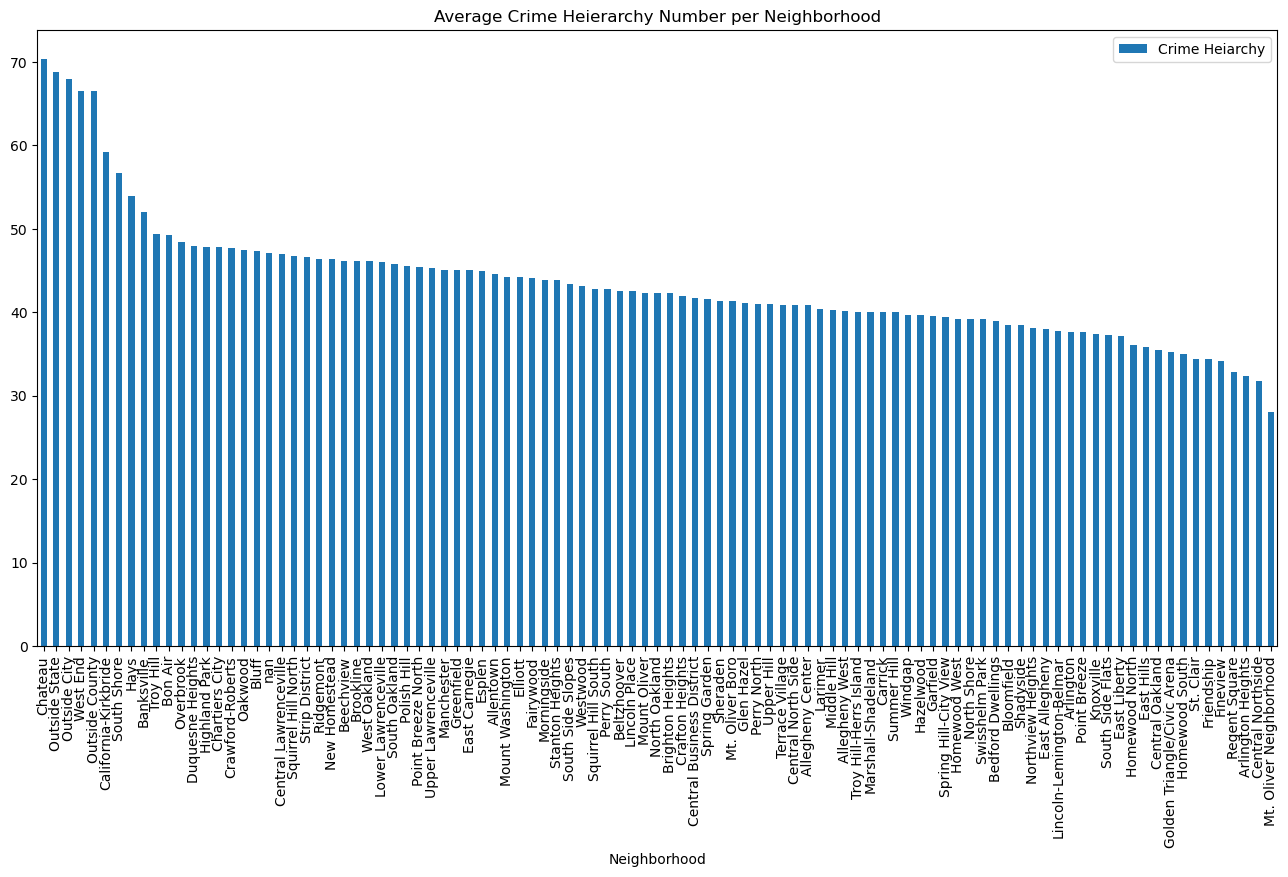

In [34]:
#sums the crime heirarchy numbers for each neighborhood 
crime_stats_by_heirarchy = {}
for i in range(len(crime_stats)):
    neighborhood = crime_stats.iloc[i,7]
    heirarchy_number = crime_stats.iloc[i,3]
    if neighborhood in crime_stats_by_heirarchy:
        crime_stats_by_heirarchy[neighborhood]+= heirarchy_number
    else:
        crime_stats_by_heirarchy[neighborhood] = heirarchy_number


#finds the average crime heirarchy number by dividing the sum of the hierarchy numbers by 
#total number of crimes commited 
crime_stats_by_ave_heirarchy={}

for neighborhood in crime_stats_by_heirarchy:
    
    crime_hierarchy_num = crime_stats_by_heirarchy[neighborhood]
    crime_num = crime_stats_by_number[neighborhood]

    crime_stats_by_ave_heirarchy[neighborhood] = crime_hierarchy_num/crime_num

#sorts by hierarchy number from highest to lowest 
sorted_average_hierarchy = dict(sorted(crime_stats_by_ave_heirarchy.items(), key=lambda item: item[1], reverse = True))

#stores for data visualzation
crimes_hierarchy_df = pd.DataFrame(list(sorted_average_hierarchy.items()), columns=['Neighborhood', 'Crime Heiarchy'])
crimes_hierarchy_df.plot(
    x='Neighborhood', 
    y='Crime Heiarchy', 
    kind='bar', 
    figsize=(16, 8), 
    title='Average Crime Heierarchy Number per Neighborhood', 
)

#assigns each city a ranking with the lower score meaning higher average crime number, 
#and therefore less violent crimes and more safe 
hierarchy_score ={} 
i = 1
for key in sorted_average_hierarchy:
    hierarchy_score[key]= i
    i += 1 


#prints top 10 
print("Top 10:")
i = 1 
for key in hierarchy_score:
    if i <=10:
        print(f"{i}: {key}")
    i += 1

In [37]:
#finds the average of the 2 scoring metrics 
average_scores = {}
for neighborhood in hierarchy_score:
    score1 = hierarchy_score[neighborhood]
    score2 = number_of_crimes_score[neighborhood]
    average_score = (score1 + score2) / 2
    average_scores[neighborhood] = average_score

#sorts the citys by their average ranking
average_scores_sorted = dict(sorted(average_scores.items(), key=lambda item: item[1]))

#assigns each city a ranking based on their final score
#with the lower score meaning the neighborhood is safer.
final_score ={} 
i = 1
for key in average_scores_sorted:
    final_score[key]= i
    i += 1 

#prints top 10 
print("Top 10:")
i = 1 
for key in final_score:
    if i <=10:
        print(f"{i}: {key}")
    i += 1

Top 10:
1: Outside County
2: Outside State
3: Chartiers City
4: Hays
5: Ridgemont
6: New Homestead
7: West End
8: Oakwood
9: South Shore
10: Bon Air
{'Outside County': 1, 'Outside State': 2, 'Chartiers City': 3, 'Hays': 4, 'Ridgemont': 5, 'New Homestead': 6, 'West End': 7, 'Oakwood': 8, 'South Shore': 9, 'Bon Air': 10, 'Duquesne Heights': 11, 'East Carnegie': 12, 'California-Kirkbride': 13, 'Banksville': 14, 'Outside City': 15, 'Troy Hill': 16, 'Polish Hill': 17, 'Esplen': 18, 'Mt. Oliver Boro': 19, 'Chateau': 20, 'Overbrook': 21, 'Fairywood': 22, 'Mount Oliver': 23, 'Upper Lawrenceville': 24, 'West Oakland': 25, 'Troy Hill-Herrs Island': 26, 'Morningside': 27, 'Glen Hazel': 28, 'South Oakland': 29, 'Westwood': 30, 'Spring Garden': 31, 'Lower Lawrenceville': 32, 'Manchester': 33, 'Summer Hill': 34, 'Stanton Heights': 35, 'Point Breeze North': 36, 'Strip District': 37, 'Lincoln Place': 38, 'Crawford-Roberts': 39, 'Swisshelm Park': 40, 'Highland Park': 41, 'Squirrel Hill North': 42, 'Bel

Outside County ranked highest in our final rankings, thus is the safest neighborhood according to crime statistic. It scored fourth in overall number of crimes and fourth in crime hierarchy number, thus making its average the best among all neighborhoods. 

My personal favorite neighborhood is Oakland as its really the only neighborhood I've really been to so far. West and South Oakland scored decently, with them ranking 25 and 29 respectively, whilst North Oakland and Central Oakland were on the lower end of the rankings, being 67 and 91. Overall, according to crime statistics, Outside County is much safer than Oakland.    

Mt. Oliver : 1
Regent Square : 2
East Carnegie : 3
Mount Oliver Borough : 4
Arlington Heights : 5
Ridgemont : 6
Bon Air : 7
West End : 8
St. Clair : 9
Oakwood : 10
Summer Hill : 11
Spring Garden : 12
Chartiers City : 13
Glen Hazel : 14
Windgap : 15
Swisshelm Park : 16
Esplen : 17
Hays : 18
Fairywood : 19
New Homestead : 20
Friendship : 21
South Shore : 22
Duquesne Heights : 23
Allegheny West : 24
Westwood : 25
Morningside : 26
Polish Hill : 27
California-Kirkbride : 28
Stanton Heights : 29
Upper Hill : 30
Arlington : 31
Upper Lawrenceville : 32
Chateau : 33
Fineview : 34
Point Breeze North : 35
Lower Lawrenceville : 36
Bedford Dwellings : 37
Point Breeze : 38
Overbrook : 39
Banksville : 40
Homewood West : 41
Northview Heights : 42
Strip District : 43
Elliott : 44
Central Lawrenceville : 45
West Oakland : 46
Lincoln Place : 47
Allegheny Center : 48
Manchester : 49
Crafton Heights : 50
Troy Hill : 51
Larimer : 52
Highland Park : 53
South Side Slopes : 54
Garfield : 55
Beltzhoover : 56
Te